# P5 question(a)

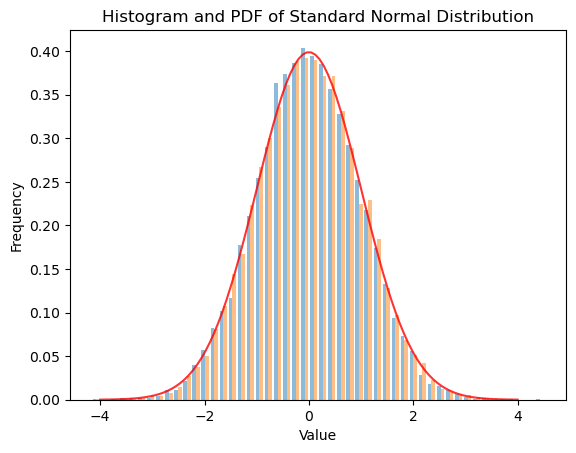

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Box-Muller
def box_muller(num_samples):
    # generate random variable u1 and u2
    u1 = np.random.rand(num_samples)
    u2 = np.random.rand(num_samples)

    # normal distribution
    x = np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
    y = np.sqrt(-2*np.log(u1)) * np.sin(2*np.pi*u2)

    return x, y

# 10000 samples
samples = box_muller(10000)

fig, ax = plt.subplots()

# histogram
ax.hist(samples, bins=50, density=True, alpha=0.5)

# PDF
x = np.linspace(-4, 4, 100)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-(x**2)/2)
ax.plot(x, pdf, 'r', alpha=0.8)

ax.set_title('Histogram and PDF of Standard Normal Distribution')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

plt.show()

# P5 question(b)

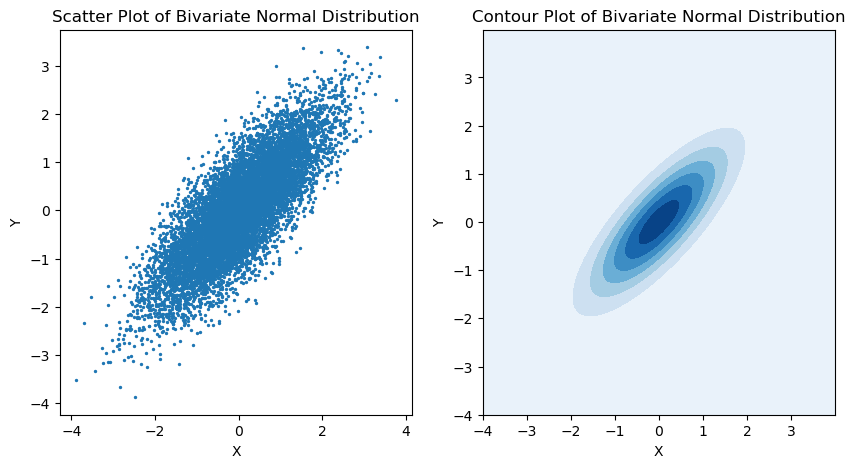

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# box-muller
def box_muller(num_samples):
    # u1 and u2
    u1 = np.random.rand(num_samples)
    u2 = np.random.rand(num_samples)

    # normal distribution
    x = np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
    y = np.sqrt(-2*np.log(u1)) * np.sin(2*np.pi*u2)

    return x, y

def bivariate_normal(num_samples, rho):
    x, y = box_muller(num_samples)

    # transformation
    x_new = x
    y_new = rho*x + np.sqrt(1-rho**2)*y

    return x_new, y_new

# sample with 10000, 0.8
samples = bivariate_normal(10000, 0.8)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].scatter(samples[0], samples[1], s=2)

x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.dstack((x, y))
cov = np.array([[1, 0.8], [0.8, 1]])
rv = multivariate_normal([0, 0], cov, 10000)
axs[1].contourf(x, y, rv.pdf(pos), cmap='Blues')

axs[0].set_title('Scatter Plot of Bivariate Normal Distribution')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Contour Plot of Bivariate Normal Distribution')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

plt.show()

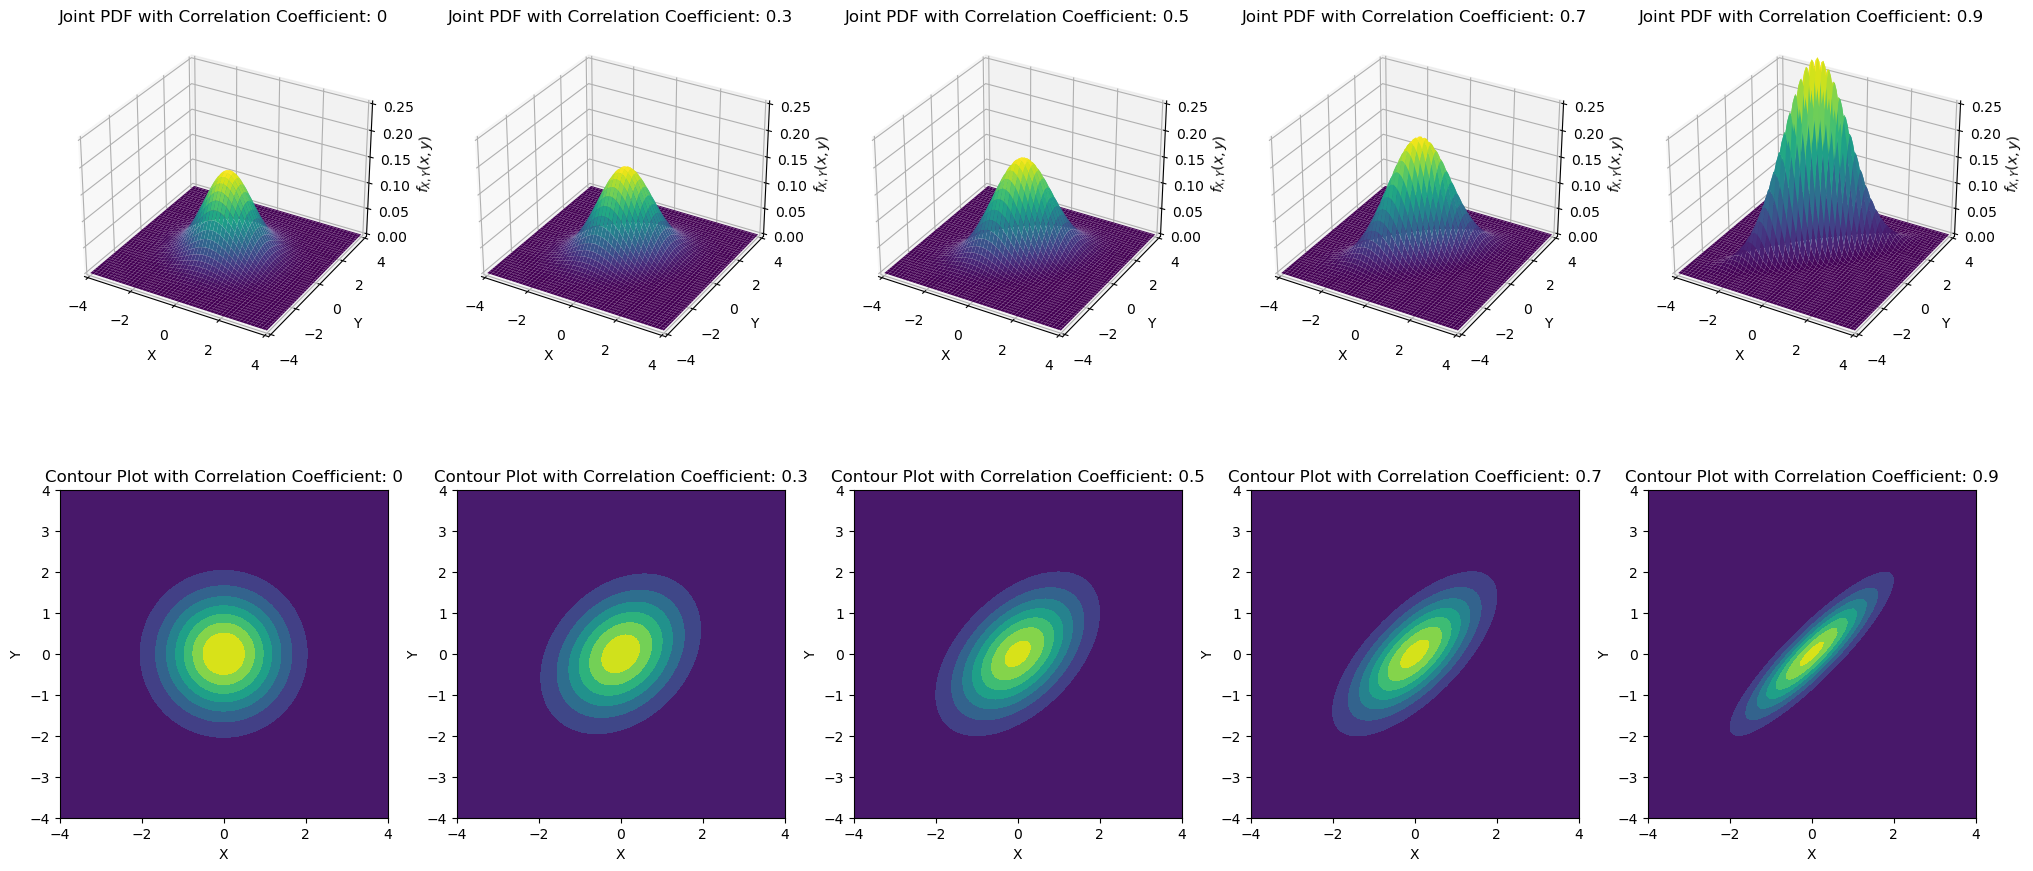

In [54]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mean = np.array([0, 0])
x, y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
x_y_grid = np.stack((x, y), axis=-1)
labels = [0, 0.3, 0.5, 0.7, 0.9]

fig = plt.figure(figsize=(20, 10))

i = 1
for rho in labels:
    cov = np.array([[1, rho], [rho, 1]]) 

    rv = multivariate_normal(mean, cov)

    # pdf
    pdf = rv.pdf(x_y_grid)

    ax = fig.add_subplot(2, 5, i, projection='3d')
    ax.plot_surface(x, y, pdf, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel(r"$f_{X, Y}(x, y)$")
    ax.set_title(f'Joint PDF with Correlation Coefficient: {rho}')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_zlim(0.00, 0.25)

    ax = fig.add_subplot(2, 5, i+5)
    # ax.axis('equal')
    ax.set_aspect('equal')
    c = ax.contourf(x, y, pdf, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Contour Plot with Correlation Coefficient: {rho}')

    i += 1

plt.tight_layout()
plt.savefig("bivariate_normal.png", dpi=200)
plt.show()